# MINE4201
# Taller N. 1 - Modelos Colaborativos



In [3]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# carga archivo de usuarios
users = pd.read_csv('lastfm-dataset-1k/userid-profile.tsv', sep='\t')

# carga archivo de tracks
tracks = pd.read_csv('lastfm-dataset-1k/userid-timestamp-artid-artname-traid-traname.tsv',
                     sep = '\t',
                     names = ['#id', 'timestamp', 'artid', 'artname', 'trackid', 'trackname'], 
                     skiprows= [2120260-1, #elimina filas con problemas de formato
                                2446318-1,
                                11141081-1,
                                11152099-1,
                                11152402-1,
                                11882087-1,
                                12902539-1,
                                12935044-1,
                                17589539-1])

## Exploración de bases de datos

### 1. Usuarios

In [5]:
users

,#id,gender,age,country,registered
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"
...,...,...,...,...,...
987,user_000996,f,NaN,United States,"Jul 17, 2006"
988,user_000997,m,NaN,United States,"Jan 5, 2007"
989,user_000998,m,NaN,United Kingdom,"Sep 28, 2005"
990,user_000999,f,NaN,Poland,"Jul 24, 2007"


En ```users``` tenemos inicialmente 992 usuarios únicos.

- ```users['#id]``` es el número único de identificación de los usuarios
- ```gender``` es el género reportado por el usuario ```[m/f/nan]```
- ```age``` es la edad del usuario
- ```country``` es el país de origen
- ```registered``` es la fecha de registro


In [6]:
# Especificamos los tipos de variable
users.registered = pd.to_datetime(users.registered, infer_datetime_format = True)

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   #id         992 non-null    object        
 1   gender      884 non-null    object        
 2   age         286 non-null    float64       
 3   country     907 non-null    object        
 4   registered  984 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 38.9+ KB


Para ```users``` age, contamos con solo 286 datos, para ```gender``` 884 y para las demás variables con más de 900.
Más adelante tomaremos la decisión sobre que variables dejamos para el perfilamiento.

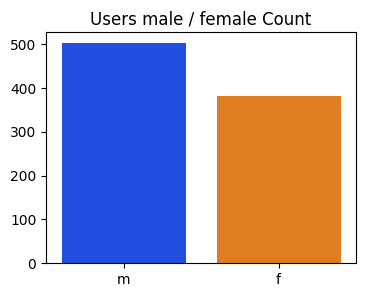

In [7]:
sns.set_palette("bright")
plt.figure(figsize=(4,3))
sns.barplot(x = (users.gender.value_counts(dropna=False)).index, y = users.gender.value_counts(dropna=False).values)
plt.title('Users male / female Count')
plt.show()

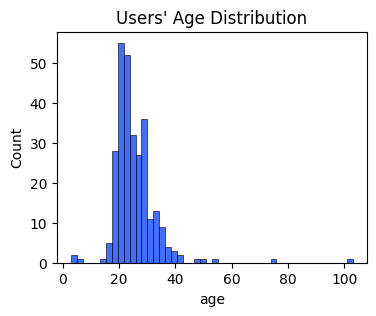

In [8]:
plt.figure(figsize=(4,3))
sns.histplot(users.age)
plt.title('Users\' Age Distribution')
plt.show()


In [9]:
users.age.describe()

count    286.000000
mean      25.367133
std        8.314952
min        3.000000
25%       21.000000
50%       23.000000
75%       28.000000
max      103.000000
Name: age, dtype: float64

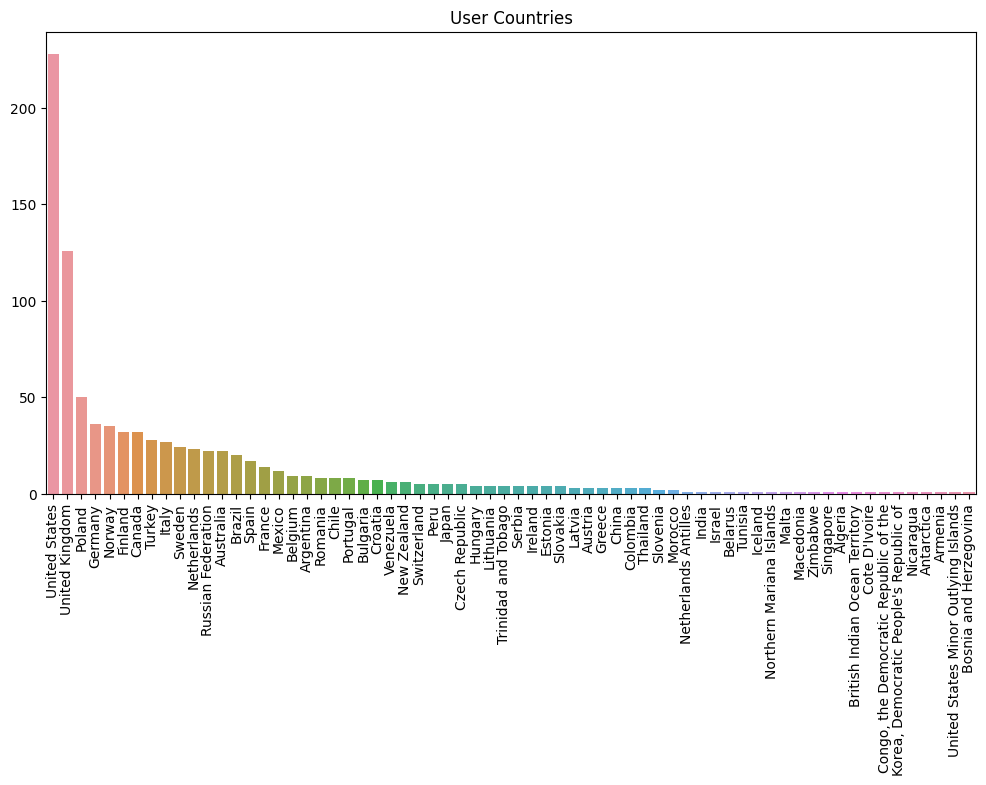

In [10]:
plt.figure(figsize=(12,6))
c = users.country.value_counts()
sns.barplot(x = c.index, y=c.values)
plt.xticks(rotation=90)
plt.title('User Countries')
plt.show()
del c

In [11]:
# Número de usuarios top-20 países (%)
users.country.value_counts(normalize=True).head(20)

United States         0.251378
United Kingdom        0.138920
Poland                0.055127
Germany               0.039691
Norway                0.038589
Finland               0.035281
Canada                0.035281
Turkey                0.030871
Italy                 0.029768
Sweden                0.026461
Netherlands           0.025358
Russian Federation    0.024256
Australia             0.024256
Brazil                0.022051
Spain                 0.018743
France                0.015436
Mexico                0.013230
Belgium               0.009923
Argentina             0.009923
Romania               0.008820
Name: country, dtype: float64

### 2. Tracks

In [12]:
tracks

,#id,timestamp,artid,artname,trackid,trackname
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
...,...,...,...,...,...,...
19098848,user_001000,2008-01-27T22:02:35Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me
19098849,user_001000,2008-01-27T21:56:52Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off
19098850,user_001000,2008-01-27T21:52:36Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds
19098851,user_001000,2008-01-27T21:49:12Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky


In [13]:
tracks = tracks.drop_duplicates().dropna()
tracks.timestamp = pd.to_datetime(tracks.timestamp, infer_datetime_format=True)

In [14]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16936133 entries, 10 to 19098852
Data columns (total 6 columns):
 #   Column     Dtype              
---  ------     -----              
 0   #id        object             
 1   timestamp  datetime64[ns, UTC]
 2   artid      object             
 3   artname    object             
 4   trackid    object             
 5   trackname  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 904.5+ MB


In [15]:
tracks['#id'].value_counts(dropna = False)

user_000949    172042
user_000791    149682
user_000544    140063
user_000861    139656
user_000691    122042
                ...  
user_000566         6
user_000895         6
user_000686         5
user_000332         2
user_000240         2
Name: #id, Length: 992, dtype: int64

In [16]:
tracks['artid'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16936133 entries, 10 to 19098852
Series name: artid
Non-Null Count     Dtype 
--------------     ----- 
16936133 non-null  object
dtypes: object(1)
memory usage: 258.4+ MB


In [17]:
tracks['artname'].value_counts(dropna = False)

Radiohead               111488
The Beatles              98525
Nine Inch Nails          82022
Muse                     60967
Coldplay                 60256
                         ...  
Lange Frans & Baas B         1
Foster Jackson               1
Project One                  1
Sasse                        1
Burlap To Cashmere           1
Name: artname, Length: 81751, dtype: int64

In [18]:
tracks.artname.info()

<class 'pandas.core.series.Series'>
Int64Index: 16936133 entries, 10 to 19098852
Series name: artname
Non-Null Count     Dtype 
--------------     ----- 
16936133 non-null  object
dtypes: object(1)
memory usage: 258.4+ MB


In [19]:
tracks.trackid.info()

<class 'pandas.core.series.Series'>
Int64Index: 16936133 entries, 10 to 19098852
Series name: trackid
Non-Null Count     Dtype 
--------------     ----- 
16936133 non-null  object
dtypes: object(1)
memory usage: 258.4+ MB


In [20]:
tracks.trackname.info()

<class 'pandas.core.series.Series'>
Int64Index: 16936133 entries, 10 to 19098852
Series name: trackname
Non-Null Count     Dtype 
--------------     ----- 
16936133 non-null  object
dtypes: object(1)
memory usage: 258.4+ MB


In [21]:
tracks[tracks.artname == 'Radiohead']

,#id,timestamp,artid,artname,trackid,trackname
1425,user_000001,2009-04-03 10:44:22+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,31600df4-e6dd-48ca-9f6b-8804027d8d6e,Jigsaw Falling Into Place
5168,user_000001,2008-12-01 13:57:01+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,8fa2de7e-49e0-4201-87ae-d9f2bab81730,Nude
5169,user_000001,2008-12-01 13:50:11+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,a345146f-41f8-484e-a03a-e2c86a424ba1,Bodysnatchers
5170,user_000001,2008-12-01 13:46:13+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,e5be3063-0f68-4c28-8a4e-d19a354b0872,15 Step
5261,user_000001,2008-11-28 07:24:18+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,f74b48a6-5a60-4b5a-864d-3ecb7e983c31,Weird Fishes/Arpeggi
...,...,...,...,...,...,...
19098689,user_001000,2008-01-31 21:39:39+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,72c6b4d3-71a8-4c70-bf50-da11c0149089,All I Need
19098690,user_001000,2008-01-31 21:34:22+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,f74b48a6-5a60-4b5a-864d-3ecb7e983c31,Weird Fishes/Arpeggi
19098691,user_001000,2008-01-31 21:30:06+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,8fa2de7e-49e0-4201-87ae-d9f2bab81730,Nude
19098692,user_001000,2008-01-31 21:26:04+00:00,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,a345146f-41f8-484e-a03a-e2c86a424ba1,Bodysnatchers


Tenemos más información en ```artname``` que en ```artid``` y en ```trackname``` que en ```trackid```.
Por el momento vamos a eliminar ```artid```, ```trackid``` y ```timestamp```, esta última ya que no la vamos a usar.

Adicionalmente, eliminamos duplicados y filas con ```nan```.

In [22]:
tracks_adj = tracks[['#id', 'artname', 'trackname']]
tracks_adj = tracks_adj.dropna().drop_duplicates()
tracks_adj

,#id,artname,trackname
10,user_000001,坂本龍一,The Last Emperor (Theme)
12,user_000001,坂本龍一,Tibetan Dance (Version)
14,user_000001,Underworld,"Boy, Boy, Boy (Switch Remix)"
15,user_000001,Underworld,Crocodile (Innervisions Orchestra Mix)
16,user_000001,Ennio Morricone,Ninna Nanna In Blu (Raw Deal Remix)
...,...,...,...
19098779,user_001000,Dj Vadim,Dig Yourself Baby
19098780,user_001000,Dj Vadim,Building Tension In 2 Dimensions
19098782,user_001000,Dj Vadim,Life From The Itchyside
19098783,user_001000,Dj Vadim,My Favorite Letter


In [23]:
tracks_adj.shape

(3955167, 3)

Calculamos número de escuchas por artista y por canción

In [24]:
# número de interacciones por usuario
num_inter_usuario = tracks_adj['#id'].value_counts()
num_inter_usuario

user_000691    59237
user_000861    43757
user_000681    36736
user_000800    31833
user_000774    29978
               ...  
user_000895        6
user_000686        5
user_000856        5
user_000332        2
user_000240        2
Name: #id, Length: 992, dtype: int64

<AxesSubplot: xlabel='#id', ylabel='Count'>

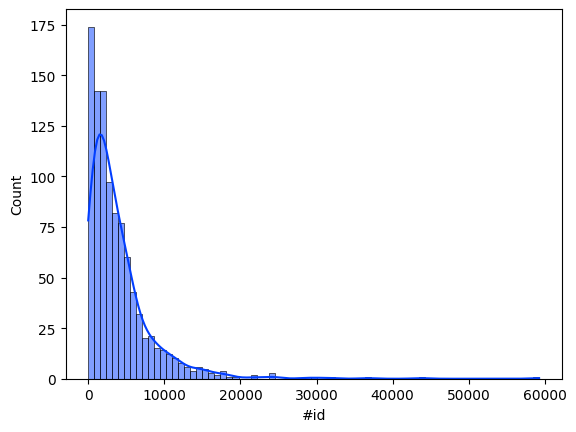

In [25]:
sns.histplot(num_inter_usuario, kde=True)

# Creación de la matriz usuario-item

Procedemos a crear una columna de ratings para cada item.
Primero trabajamos sobre los artistas como items.

In [26]:
#Seleccionamos solo los artistas como items
track_artista = tracks_adj.copy()
track_artista = track_artista.drop_duplicates().dropna()

In [27]:
track_artista.shape

(3955167, 3)

In [28]:
def art_rating(track_artista):
    counter = 0
    cuenta_total = list()
    cuenta_artista = list()
    artistas_usuario = list()
    for usr in track_artista['#id'].unique():
        usr_df = track_artista[track_artista['#id'] == usr]
        n_art = track_artista[track_artista['#id'] == usr].artname.nunique()
        n = len(usr_df)
        for art in usr_df.artname:
            n_artista = usr_df[usr_df.artname == art].artname.count()
            cuenta_artista.append(n_artista)
            cuenta_total.append(n)
            artistas_usuario.append(n_art)

        if counter % 100 == 0:
            print('User {} done'.format(counter))
        counter += 1
    return cuenta_artista, cuenta_total, artistas_usuario

In [29]:
freq_usuarios = track_artista['#id'].value_counts()
freq_usuarios

user_000691    59237
user_000861    43757
user_000681    36736
user_000800    31833
user_000774    29978
               ...  
user_000895        6
user_000686        5
user_000856        5
user_000332        2
user_000240        2
Name: #id, Length: 992, dtype: int64

Revisamos top 10 usuarios

In [30]:
track_artista[track_artista['#id'] == 'user_000861'].artname.value_counts()

Marillion                      288
Pink Floyd                     248
Alphaville                     244
Depeche Mode                   243
John Williams                  229
                              ... 
Woven Hand                       1
Bodies Of Water                  1
David Buttolph                   1
Sam The Sham & The Pharaohs      1
Trey Parker                      1
Name: artname, Length: 3970, dtype: int64

In [31]:
track_artista[track_artista['#id'] == 'user_000691'].artname.value_counts()

Miles Davis                     309
Bob Dylan                       268
Tom Waits                       257
Guided By Voices                249
The Beatles                     242
                               ... 
The Mickey Finn                   1
Damien Jurado & Rosie Thomas      1
The Syndicats                     1
Bruce Cockburn                    1
Gob                               1
Name: artname, Length: 4051, dtype: int64

In [32]:
''' 
Este código se demora 1 hora en correr!
'''
#plays_por_artista, tot_plays_usuario, n_artistas_usuario = art_rating(track_artista)

# track_artista['tot_plays_usuario'] = tot_plays_usuario
# track_artista['plays_por_artista'] = plays_por_artista
# track_artista['n_artistas_usuario'] = n_artistas_usuario
# track_artista

' \nEste código se demora 1 hora en correr!\n'

Distribución de ```plays por usuario``` (# de veces que oye una canción), ```plays por artista``` númmero de veces que el usuario oye una canción del artista y ```n_artistas_usuario``` , número total de artistas oido por cada usuario en el playlist.

In [33]:
#track_artista.to_csv('df_track_artistas.csv')

In [34]:
load_track_artista = pd.read_csv('df_track_artistas.csv')

In [35]:
artista = load_track_artista[['#id', 'artname','tot_plays_usuario', 'plays_por_artista', 'n_artistas_usuario']]
artista = artista.drop_duplicates().dropna()
artista

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario
0,user_000001,坂本龍一,2325,45,496
2,user_000001,Underworld,2325,56,496
4,user_000001,Ennio Morricone,2325,2,496
5,user_000001,Minus 8,2325,3,496
6,user_000001,Beanfield,2325,1,496
...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586
3955135,user_001000,John Coltrane,4683,12,586
3955147,user_001000,Miles Davis Quintet,4683,2,586
3955149,user_001000,Miles Davis Sextet,4683,2,586


El df ```artista``` elimina duplicados, ya que prescindimos por ahora de las canciones, que están capturadas en el número de plays por artista.

Text(0.5, 1.0, 'Num de reproducciones por usuario')

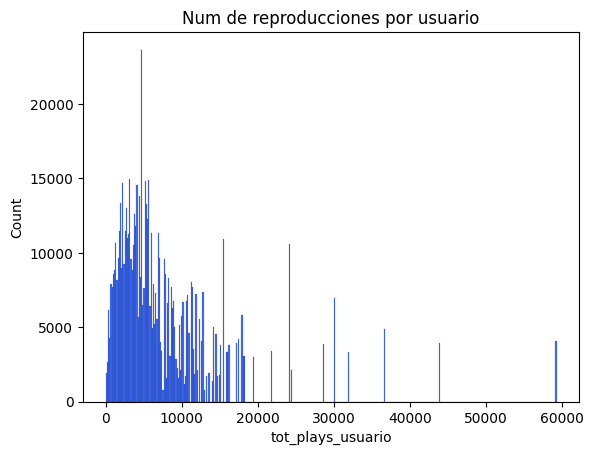

In [36]:
sns.histplot(artista['tot_plays_usuario'])
plt.title('Num de reproducciones por usuario')

Text(0.5, 1.0, 'Num de Reproducciones de un mismo artista, por usuario')

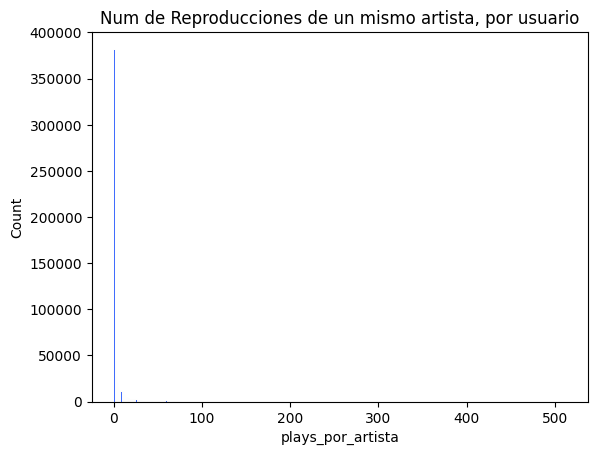

In [37]:
sns.histplot(artista['plays_por_artista'])
plt.title('Num de Reproducciones de un mismo artista, por usuario')

In [38]:
artista.plays_por_artista.describe()

count    731602.000000
mean          5.406173
std          11.081291
min           1.000000
25%           1.000000
50%           1.000000
75%           5.000000
max         512.000000
Name: plays_por_artista, dtype: float64

In [39]:
test_play_artista = artista[artista.plays_por_artista <=  300]
test_play_artista.describe()

,tot_plays_usuario,plays_por_artista,n_artistas_usuario
count,731583.000000,731583.000000,731583.000000
mean,7941.615695,5.397053,1523.122476
std,7930.436980,10.932694,1232.140088
min,2.000000,1.000000,1.000000
25%,3135.000000,1.000000,626.000000
50%,5542.000000,1.000000,1164.000000
75%,10122.000000,5.000000,1993.000000
max,59237.000000,299.000000,6930.000000


Si eliminamos el artista que tiene 512 reproducciones, los siguientes siguen sesgando las estadísticas.

Hay usuarios que han dado muy pocas reproducciones. Deberíamos seleccionar aquellos que hayan tenido un número de reproducciones más relevante


In [40]:
test_plays_usuario = artista[artista.tot_plays_usuario > 500]
test_plays_usuario

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario
0,user_000001,坂本龍一,2325,45,496
2,user_000001,Underworld,2325,56,496
4,user_000001,Ennio Morricone,2325,2,496
5,user_000001,Minus 8,2325,3,496
6,user_000001,Beanfield,2325,1,496
...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586
3955135,user_001000,John Coltrane,4683,12,586
3955147,user_001000,Miles Davis Quintet,4683,2,586
3955149,user_001000,Miles Davis Sextet,4683,2,586


In [41]:
test_plays_usuario.describe()

,tot_plays_usuario,plays_por_artista,n_artistas_usuario
count,719957.000000,719957.000000,719957.000000
mean,8065.020903,5.456123,1545.156690
std,7934.419905,11.150854,1229.656751
min,505.000000,1.000000,42.000000
25%,3211.000000,1.000000,651.000000
50%,5604.000000,1.000000,1184.000000
75%,10157.000000,5.000000,2015.000000
max,59237.000000,512.000000,6930.000000


Text(0.5, 1.0, 'Repro Totales Usuario (>500)')

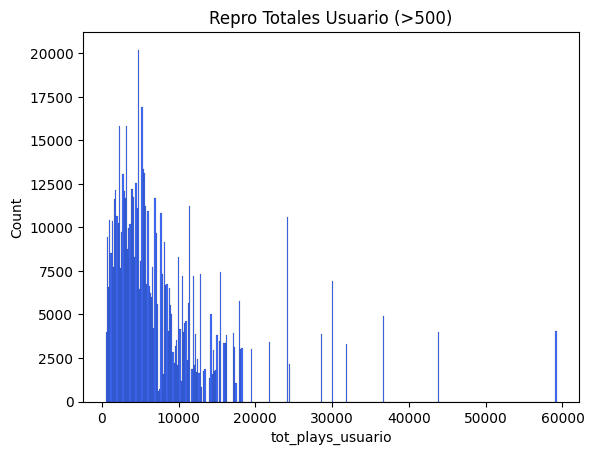

In [42]:
sns.histplot(test_plays_usuario.tot_plays_usuario)
plt.title('Repro Totales Usuario (>500)')

In [43]:
test_plays_usuario[test_plays_usuario.tot_plays_usuario == 59237]

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario
2604322,user_000691,Cocteau Twins,59237,38,4051
2604323,user_000691,Shaquille O'Neal,59237,8,4051
2604324,user_000691,Bill Fox,59237,27,4051
2604325,user_000691,Elvis Costello,59237,152,4051
2604326,user_000691,Belle And Sebastian,59237,97,4051
...,...,...,...,...,...
2663388,user_000691,Fear,59237,1,4051
2663393,user_000691,Del Gado,59237,1,4051
2663462,user_000691,Jega,59237,1,4051
2663485,user_000691,Dujeous,59237,1,4051


Investigamos el usuario ```691```.
- Ha tenido más de 59237 reproducciones.

In [44]:
usr_691 = artista[artista['#id'] ==  'user_000691']
usr_691

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario
2604322,user_000691,Cocteau Twins,59237,38,4051
2604323,user_000691,Shaquille O'Neal,59237,8,4051
2604324,user_000691,Bill Fox,59237,27,4051
2604325,user_000691,Elvis Costello,59237,152,4051
2604326,user_000691,Belle And Sebastian,59237,97,4051
...,...,...,...,...,...
2663388,user_000691,Fear,59237,1,4051
2663393,user_000691,Del Gado,59237,1,4051
2663462,user_000691,Jega,59237,1,4051
2663485,user_000691,Dujeous,59237,1,4051


In [45]:
usr_691.plays_por_artista.describe()

count    4051.000000
mean       14.622809
std        22.767888
min         1.000000
25%         1.000000
50%         8.000000
75%        18.000000
max       309.000000
Name: plays_por_artista, dtype: float64

Ahora investigamos el comportamiento de ```numero artistas usuario```. Ya que hay por lo menos un usuario que solo ha hecho reproducciones en un artista.

Text(0.5, 1.0, 'Numero_artistas por usuario')

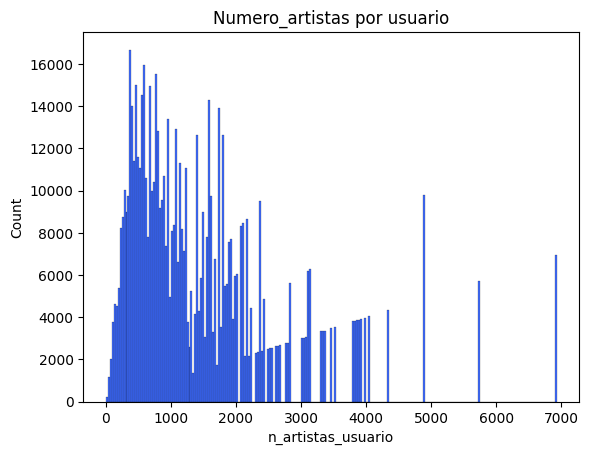

In [46]:
sns.histplot(artista.n_artistas_usuario)
plt.title('Numero_artistas por usuario')

In [47]:
artista.n_artistas_usuario.nsmallest(100)

3228688     1
923472      2
923473      2
1252345     2
1252346     2
           ..
3381911    20
3381912    20
3381913    20
3381914    20
3381915    20
Name: n_artistas_usuario, Length: 100, dtype: int64

## Ajustes para creación de ratings

In [48]:
artista.describe()

,tot_plays_usuario,plays_por_artista,n_artistas_usuario
count,731602.000000,731602.000000,731602.000000
mean,7941.659785,5.406173,1523.113359
std,7930.578020,11.081291,1232.134740
min,2.000000,1.000000,1.000000
25%,3135.000000,1.000000,626.000000
50%,5542.000000,1.000000,1164.000000
75%,10122.000000,5.000000,1993.000000
max,59237.000000,512.000000,6930.000000


In [49]:
artista

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario
0,user_000001,坂本龍一,2325,45,496
2,user_000001,Underworld,2325,56,496
4,user_000001,Ennio Morricone,2325,2,496
5,user_000001,Minus 8,2325,3,496
6,user_000001,Beanfield,2325,1,496
...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586
3955135,user_001000,John Coltrane,4683,12,586
3955147,user_001000,Miles Davis Quintet,4683,2,586
3955149,user_001000,Miles Davis Sextet,4683,2,586


1. Eliminamos '''outliers'''
- Usuarios con menos de 500 artistas

In [50]:
artista_adj = artista[artista.tot_plays_usuario >= 500]
artista_adj

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario
0,user_000001,坂本龍一,2325,45,496
2,user_000001,Underworld,2325,56,496
4,user_000001,Ennio Morricone,2325,2,496
5,user_000001,Minus 8,2325,3,496
6,user_000001,Beanfield,2325,1,496
...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586
3955135,user_001000,John Coltrane,4683,12,586
3955147,user_001000,Miles Davis Quintet,4683,2,586
3955149,user_001000,Miles Davis Sextet,4683,2,586


In [51]:
artista_adj.describe()

,tot_plays_usuario,plays_por_artista,n_artistas_usuario
count,719957.000000,719957.000000,719957.000000
mean,8065.020903,5.456123,1545.156690
std,7934.419905,11.150854,1229.656751
min,505.000000,1.000000,42.000000
25%,3211.000000,1.000000,651.000000
50%,5604.000000,1.000000,1184.000000
75%,10157.000000,5.000000,2015.000000
max,59237.000000,512.000000,6930.000000


2. Eliminamos usuarios con menos de 500 artistas (condición adicional a la anterior)

In [52]:
artista_adj = artista[(artista.tot_plays_usuario >= 500) & (artista.n_artistas_usuario >= 500)]
artista_adj

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario
2325,user_000002,Simon & Garfunkel,7696,21,1139
2328,user_000002,Soap&Skin,7696,3,1139
2331,user_000002,Smog,7696,1,1139
2332,user_000002,Sixpence None The Richer,7696,2,1139
2333,user_000002,The Sonics,7696,19,1139
...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586
3955135,user_001000,John Coltrane,4683,12,586
3955147,user_001000,Miles Davis Quintet,4683,2,586
3955149,user_001000,Miles Davis Sextet,4683,2,586


In [53]:
artista_adj.describe()

,tot_plays_usuario,plays_por_artista,n_artistas_usuario
count,603594.000000,603594.000000,603594.000000
mean,9183.370809,5.234913,1776.144905
std,8183.709683,10.787215,1213.056404
min,763.000000,1.000000,501.000000
25%,4269.000000,1.000000,879.000000
50%,6696.000000,1.000000,1490.000000
75%,11279.000000,4.000000,2167.000000
max,59237.000000,512.000000,6930.000000


Asumimos que un usuario divide su atención entre el número de artistas en su playlist.
Por tanto, el primer paso es dividir el número de reproducciones total del usuario por el número de artistas en su lista.
Esta variable, la incluimos como ```peso_artista```.

In [54]:
artista_adj['peso_artista'] = artista_adj.plays_por_artista / artista_adj.n_artistas_usuario
artista_adj

/var/folders/vc/bv3v1b7126ng926zjj9gm01w0000gp/T/ipykernel_88441/3431014388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artista_adj['peso_artista'] = artista_adj.plays_por_artista / artista_adj.n_artistas_usuario


,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista
2325,user_000002,Simon & Garfunkel,7696,21,1139,0.018437
2328,user_000002,Soap&Skin,7696,3,1139,0.002634
2331,user_000002,Smog,7696,1,1139,0.000878
2332,user_000002,Sixpence None The Richer,7696,2,1139,0.001756
2333,user_000002,The Sonics,7696,19,1139,0.016681
...,...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586,0.015358
3955135,user_001000,John Coltrane,4683,12,586,0.020478
3955147,user_001000,Miles Davis Quintet,4683,2,586,0.003413
3955149,user_001000,Miles Davis Sextet,4683,2,586,0.003413


In [55]:
artista_adj.peso_artista.describe()

count    603594.000000
mean          0.004397
std           0.010788
min           0.000144
25%           0.000615
50%           0.001250
75%           0.003311
max           0.498596
Name: peso_artista, dtype: float64

Ahora, se multiplica el ```peso_artista``` por el logaritmo del total de reproducciones.
La idea con esto, es ponderar el "gusto" del usuario del artista por el total de reproducciones, dándole un peso decreciente (de ahí el log) a el número de reproducciones que se aleja de la media.

In [56]:
f_rating = artista_adj.copy()
f_rating['fuente_rating'] = (np.log10(artista_adj.peso_artista / artista_adj.tot_plays_usuario))
f_rating

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating
2325,user_000002,Simon & Garfunkel,7696,21,1139,0.018437,-5.620569
2328,user_000002,Soap&Skin,7696,3,1139,0.002634,-6.465668
2331,user_000002,Smog,7696,1,1139,0.000878,-6.942789
2332,user_000002,Sixpence None The Richer,7696,2,1139,0.001756,-6.641759
2333,user_000002,The Sonics,7696,19,1139,0.016681,-5.664035
...,...,...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586,0.015358,-5.484179
3955135,user_001000,John Coltrane,4683,12,586,0.020478,-5.359241
3955147,user_001000,Miles Davis Quintet,4683,2,586,0.003413,-6.137392
3955149,user_001000,Miles Davis Sextet,4683,2,586,0.003413,-6.137392


In [57]:
f_rating.describe()

,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating
count,603594.000000,603594.000000,603594.000000,603594.000000,603594.000000
mean,9183.370809,5.234913,1776.144905,0.004397,-6.641111
std,8183.709683,10.787215,1213.056404,0.010788,0.711419
min,763.000000,1.000000,501.000000,0.000144,-8.380155
25%,4269.000000,1.000000,879.000000,0.000615,-7.149117
50%,6696.000000,1.000000,1490.000000,0.001250,-6.665538
75%,11279.000000,4.000000,2167.000000,0.003311,-6.174798
max,59237.000000,512.000000,6930.000000,0.498596,-3.622837


<AxesSubplot: xlabel='fuente_rating', ylabel='Count'>

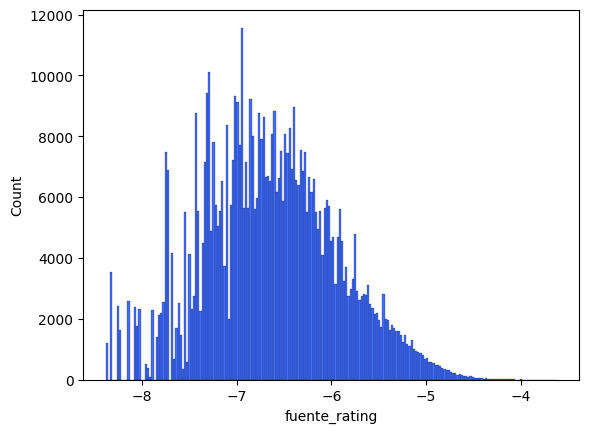

In [58]:
sns.histplot((f_rating.fuente_rating))

Aplicamos técnica de normalización ```minmax```

In [59]:
f_rating['re_based_rating'] = (f_rating.fuente_rating - f_rating.fuente_rating.min()) / (f_rating.fuente_rating.max() - f_rating.fuente_rating.min())
f_rating

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating,re_based_rating
2325,user_000002,Simon & Garfunkel,7696,21,1139,0.018437,-5.620569,0.580072
2328,user_000002,Soap&Skin,7696,3,1139,0.002634,-6.465668,0.402430
2331,user_000002,Smog,7696,1,1139,0.000878,-6.942789,0.302138
2332,user_000002,Sixpence None The Richer,7696,2,1139,0.001756,-6.641759,0.365415
2333,user_000002,The Sonics,7696,19,1139,0.016681,-5.664035,0.570935
...,...,...,...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586,0.015358,-5.484179,0.608741
3955135,user_001000,John Coltrane,4683,12,586,0.020478,-5.359241,0.635004
3955147,user_001000,Miles Davis Quintet,4683,2,586,0.003413,-6.137392,0.471434
3955149,user_001000,Miles Davis Sextet,4683,2,586,0.003413,-6.137392,0.471434


<AxesSubplot: xlabel='re_based_rating', ylabel='Count'>

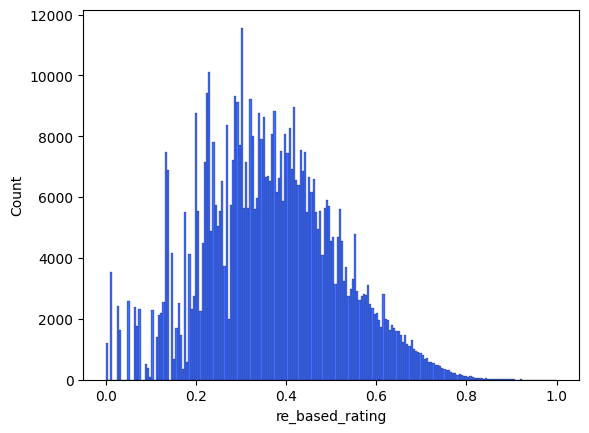

In [60]:
sns.histplot((f_rating.re_based_rating))

Finalmente, volvemos a normalizar los ratings del usuario, restando la media de calificaciones.

In [61]:
def rebase_ratings(df):
    mean_ratings = dict()
    for user in df['#id'].unique():
        df_user = df[df['#id'] == user]
        mean_rating = df_user.re_based_rating.mean()
        mean_ratings[user] = mean_rating
        del df_user
    return mean_ratings


In [62]:
pre_rating = f_rating.copy()
pre_rating

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating,re_based_rating
2325,user_000002,Simon & Garfunkel,7696,21,1139,0.018437,-5.620569,0.580072
2328,user_000002,Soap&Skin,7696,3,1139,0.002634,-6.465668,0.402430
2331,user_000002,Smog,7696,1,1139,0.000878,-6.942789,0.302138
2332,user_000002,Sixpence None The Richer,7696,2,1139,0.001756,-6.641759,0.365415
2333,user_000002,The Sonics,7696,19,1139,0.016681,-5.664035,0.570935
...,...,...,...,...,...,...,...,...
3955094,user_001000,Stereo Mcs,4683,9,586,0.015358,-5.484179,0.608741
3955135,user_001000,John Coltrane,4683,12,586,0.020478,-5.359241,0.635004
3955147,user_001000,Miles Davis Quintet,4683,2,586,0.003413,-6.137392,0.471434
3955149,user_001000,Miles Davis Sextet,4683,2,586,0.003413,-6.137392,0.471434


In [63]:
mean_dict = rebase_ratings(f_rating)
len(mean_dict)

494

In [64]:
mean_dict

{'user_000002': 0.3980545886623306,
 'user_000003': 0.47821553101468484,
 'user_000004': 0.3738082014918502,
 'user_000005': 0.5288592366375456,
 'user_000006': 0.4345342024289219,
 'user_000009': 0.5576409068658573,
 'user_000012': 0.2904323557820652,
 'user_000013': 0.5519460152313326,
 'user_000015': 0.5723364020313583,
 'user_000016': 0.38631898312451085,
 'user_000017': 0.27312201344748616,
 'user_000019': 0.4779491423329159,
 'user_000020': 0.5515142413809492,
 'user_000021': 0.5145389926087983,
 'user_000022': 0.3787537829676668,
 'user_000024': 0.3392560195915211,
 'user_000025': 0.3174703868802742,
 'user_000029': 0.33446053387408897,
 'user_000031': 0.16907776633877425,
 'user_000034': 0.5307321934784557,
 'user_000035': 0.4660231400767111,
 'user_000037': 0.47210636549263674,
 'user_000040': 0.4563322183729976,
 'user_000041': 0.3077049323246489,
 'user_000043': 0.379039289939426,
 'user_000050': 0.5332027594023889,
 'user_000052': 0.49472672375584587,
 'user_000053': 0.2594

In [65]:
df_means = pd.DataFrame(mean_dict.items())
df_means.columns = ['#id', 're_based_rating_mean']
df_means

,#id,re_based_rating_mean
0,user_000002,0.398055
1,user_000003,0.478216
2,user_000004,0.373808
3,user_000005,0.528859
4,user_000006,0.434534
...,...,...
489,user_000993,0.525237
490,user_000994,0.498605
491,user_000995,0.446482
492,user_000998,0.550654


In [66]:
df_pre_rating = pd.merge(left = f_rating, right = df_means, how='left', on='#id')

In [67]:
df_pre_rating

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating,re_based_rating,re_based_rating_mean
0,user_000002,Simon & Garfunkel,7696,21,1139,0.018437,-5.620569,0.580072,0.398055
1,user_000002,Soap&Skin,7696,3,1139,0.002634,-6.465668,0.402430,0.398055
2,user_000002,Smog,7696,1,1139,0.000878,-6.942789,0.302138,0.398055
3,user_000002,Sixpence None The Richer,7696,2,1139,0.001756,-6.641759,0.365415,0.398055
4,user_000002,The Sonics,7696,19,1139,0.016681,-5.664035,0.570935,0.398055
...,...,...,...,...,...,...,...,...,...
603589,user_001000,Stereo Mcs,4683,9,586,0.015358,-5.484179,0.608741,0.511118
603590,user_001000,John Coltrane,4683,12,586,0.020478,-5.359241,0.635004,0.511118
603591,user_001000,Miles Davis Quintet,4683,2,586,0.003413,-6.137392,0.471434,0.511118
603592,user_001000,Miles Davis Sextet,4683,2,586,0.003413,-6.137392,0.471434,0.511118


In [68]:
df_pre_rating['adj_base_rating'] = df_pre_rating.re_based_rating - df_pre_rating.re_based_rating_mean
df_pre_rating

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating,re_based_rating,re_based_rating_mean,adj_base_rating
0,user_000002,Simon & Garfunkel,7696,21,1139,0.018437,-5.620569,0.580072,0.398055,0.182017
1,user_000002,Soap&Skin,7696,3,1139,0.002634,-6.465668,0.402430,0.398055,0.004375
2,user_000002,Smog,7696,1,1139,0.000878,-6.942789,0.302138,0.398055,-0.095917
3,user_000002,Sixpence None The Richer,7696,2,1139,0.001756,-6.641759,0.365415,0.398055,-0.032639
4,user_000002,The Sonics,7696,19,1139,0.016681,-5.664035,0.570935,0.398055,0.172880
...,...,...,...,...,...,...,...,...,...,...
603589,user_001000,Stereo Mcs,4683,9,586,0.015358,-5.484179,0.608741,0.511118,0.097623
603590,user_001000,John Coltrane,4683,12,586,0.020478,-5.359241,0.635004,0.511118,0.123885
603591,user_001000,Miles Davis Quintet,4683,2,586,0.003413,-6.137392,0.471434,0.511118,-0.039684
603592,user_001000,Miles Davis Sextet,4683,2,586,0.003413,-6.137392,0.471434,0.511118,-0.039684


In [69]:
escala_norm = df_pre_rating.adj_base_rating.describe()
escala_norm

count    6.035940e+05
mean    -4.649887e-19
std      9.640038e-02
min     -2.037906e-01
25%     -6.761642e-02
50%     -4.272016e-02
75%      5.763009e-02
max      4.813359e-01
Name: adj_base_rating, dtype: float64

<AxesSubplot: xlabel='adj_base_rating', ylabel='Count'>

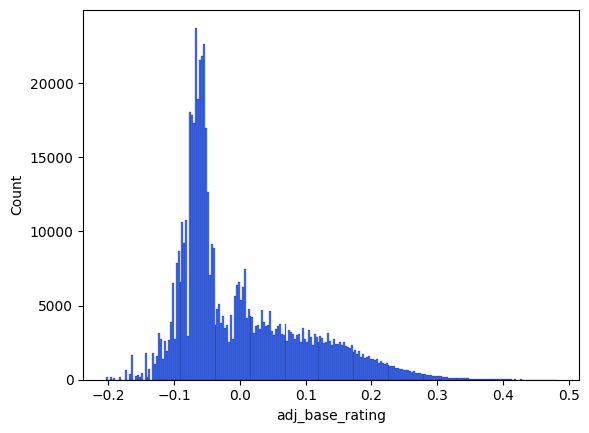

In [70]:
sns.histplot(df_pre_rating.adj_base_rating)

El resultado del ajuste al restar la media no es satisfactorio.
Ejecutamos la conversión a ratings categóricos usando ```re_based_rating```

In [71]:
escala =  df_pre_rating.re_based_rating.describe()
escala

count    603594.000000
mean          0.365551
std           0.149542
min           0.000000
25%           0.258767
50%           0.360417
75%           0.463572
max           1.000000
Name: re_based_rating, dtype: float64

<AxesSubplot: xlabel='re_based_rating', ylabel='Count'>

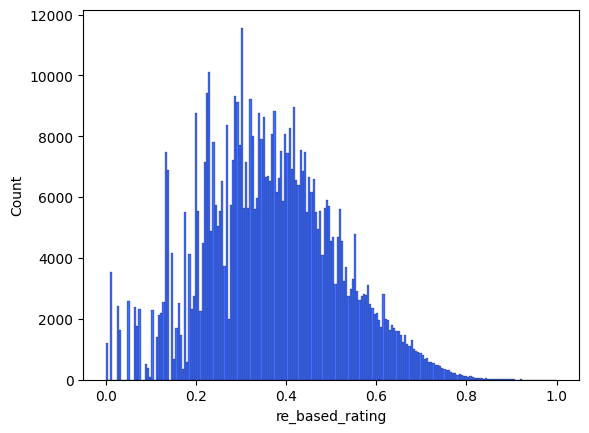

In [72]:
sns.histplot(df_pre_rating.re_based_rating)

In [73]:
std = escala[2]
mean = escala[1]
c1 = mean - 1*std
c2 = mean - 0.5*std
c3 = mean + 0.5*std
c4 = mean + 1*std

def func_rating(fuente_rating):
    ratings = list()
    for fr in fuente_rating:
        if fr < c1:
            r = 1
        elif fr < c2:
            r = 2
        elif fr < c3:
            r = 3
        elif fr < c4:
            r = 4
        else:
            r = 5
        ratings.append(r)
    return ratings

In [74]:
pre_rating =df_pre_rating.copy()
pre_rating['rating'] = func_rating(df_pre_rating.re_based_rating)

In [75]:
pre_rating.describe()

,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating,re_based_rating,re_based_rating_mean,adj_base_rating,rating
count,603594.000000,603594.000000,603594.000000,603594.000000,603594.000000,603594.000000,603594.000000,6.035940e+05,603594.00000
mean,9183.370809,5.234913,1776.144905,0.004397,-6.641111,0.365551,0.365551,-4.649887e-19,2.99780
std,8183.709683,10.787215,1213.056404,0.010788,0.711419,0.149542,0.114323,9.640038e-02,1.24693
min,763.000000,1.000000,501.000000,0.000144,-8.380155,0.000000,0.085054,-2.037906e-01,1.00000
25%,4269.000000,1.000000,879.000000,0.000615,-7.149117,0.258767,0.290432,-6.761642e-02,2.00000
50%,6696.000000,1.000000,1490.000000,0.001250,-6.665538,0.360417,0.368186,-4.272016e-02,3.00000
75%,11279.000000,4.000000,2167.000000,0.003311,-6.174798,0.463572,0.454420,5.763009e-02,4.00000
max,59237.000000,512.000000,6930.000000,0.498596,-3.622837,1.000000,0.596591,4.813359e-01,5.00000


<AxesSubplot: xlabel='rating', ylabel='Count'>

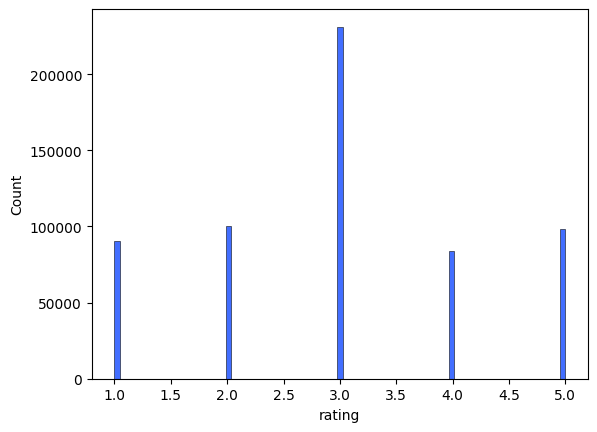

In [76]:
sns.histplot(pre_rating.rating)

In [77]:
pre_rating.head()

,#id,artname,tot_plays_usuario,plays_por_artista,n_artistas_usuario,peso_artista,fuente_rating,re_based_rating,re_based_rating_mean,adj_base_rating,rating
0,user_000002,Simon & Garfunkel,7696,21,1139,0.018437,-5.620569,0.580072,0.398055,0.182017,5
1,user_000002,Soap&Skin,7696,3,1139,0.002634,-6.465668,0.402430,0.398055,0.004375,3
2,user_000002,Smog,7696,1,1139,0.000878,-6.942789,0.302138,0.398055,-0.095917,3
3,user_000002,Sixpence None The Richer,7696,2,1139,0.001756,-6.641759,0.365415,0.398055,-0.032639,3
4,user_000002,The Sonics,7696,19,1139,0.016681,-5.664035,0.570935,0.398055,0.172880,5


In [78]:
pre_rating2 = pre_rating[['#id', 'artname', 'rating']]

In [79]:
def rebase_ratings2(df):
    mean_ratings = dict()
    max_ratings = dict()
    min_ratings = dict()
    for user in df['#id'].unique():
        df_user = df[df['#id'] == user]
        mean_rating = df_user['rating'].mean()
        max_rating = df_user['rating'].max()
        min_rating = df_user['rating'].min()
        mean_ratings[user] = mean_rating
        max_ratings[user] = max_rating
        min_ratings[user] = min_rating
        del df_user
    return mean_ratings, max_ratings, min_ratings

mean_dict2, max_dict, min_dict = rebase_ratings2(pre_rating2)

In [80]:
df_means2 = pd.DataFrame(mean_dict2.items())
df_means2.columns = ['#id', 'rating_mean']

df_max = pd.DataFrame(max_dict.items())
df_max.columns = ['#id', 'rating_max']

df_min = pd.DataFrame(min_dict.items())
df_min.columns = ['#id', 'rating_min']

In [81]:
df_min

,#id,rating_min
0,user_000002,3
1,user_000003,3
2,user_000004,3
3,user_000005,4
4,user_000006,3
...,...,...
489,user_000993,3
490,user_000994,3
491,user_000995,3
492,user_000998,3


In [82]:
dict_df = df_means2.merge(df_max, on='#id', how='left').merge(df_min, on='#id', how='left')

pre_rating2 = pd.merge(left = pre_rating2, right = dict_df, how='left', on='#id')
pre_rating2

,#id,artname,rating,rating_mean,rating_max,rating_min
0,user_000002,Simon & Garfunkel,5,3.543459,5,3
1,user_000002,Soap&Skin,3,3.543459,5,3
2,user_000002,Smog,3,3.543459,5,3
3,user_000002,Sixpence None The Richer,3,3.543459,5,3
4,user_000002,The Sonics,5,3.543459,5,3
...,...,...,...,...,...,...
603589,user_001000,Stereo Mcs,5,3.883959,5,3
603590,user_001000,John Coltrane,5,3.883959,5,3
603591,user_001000,Miles Davis Quintet,4,3.883959,5,3
603592,user_001000,Miles Davis Sextet,4,3.883959,5,3


In [83]:
pre_rating2['rating_adj'] = (pre_rating2.rating - pre_rating2.rating_mean)
pre_rating2

,#id,artname,rating,rating_mean,rating_max,rating_min,rating_adj
0,user_000002,Simon & Garfunkel,5,3.543459,5,3,1.456541
1,user_000002,Soap&Skin,3,3.543459,5,3,-0.543459
2,user_000002,Smog,3,3.543459,5,3,-0.543459
3,user_000002,Sixpence None The Richer,3,3.543459,5,3,-0.543459
4,user_000002,The Sonics,5,3.543459,5,3,1.456541
...,...,...,...,...,...,...,...
603589,user_001000,Stereo Mcs,5,3.883959,5,3,1.116041
603590,user_001000,John Coltrane,5,3.883959,5,3,1.116041
603591,user_001000,Miles Davis Quintet,4,3.883959,5,3,0.116041
603592,user_001000,Miles Davis Sextet,4,3.883959,5,3,0.116041


<AxesSubplot: xlabel='rating_adj', ylabel='Count'>

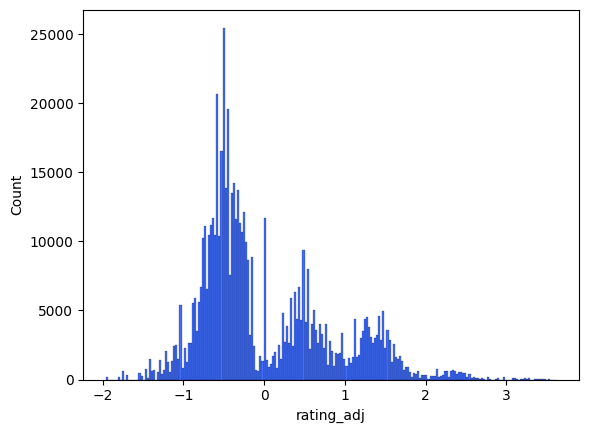

In [84]:
sns.histplot(pre_rating2.rating_adj)

## Ratings

In [85]:
ratings = pre_rating2.copy()

In [86]:
ratings.shape

(603594, 7)

In [87]:
ratings.head()

,#id,artname,rating,rating_mean,rating_max,rating_min,rating_adj
0,user_000002,Simon & Garfunkel,5,3.543459,5,3,1.456541
1,user_000002,Soap&Skin,3,3.543459,5,3,-0.543459
2,user_000002,Smog,3,3.543459,5,3,-0.543459
3,user_000002,Sixpence None The Richer,3,3.543459,5,3,-0.543459
4,user_000002,The Sonics,5,3.543459,5,3,1.456541


## Modelos de recomendación

In [88]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import random

In [112]:
#Para garantizar reproducibilidad en resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

#escala ratings
rmin = ratings.rating_adj.min()
rmax = ratings.rating_adj.max()

#carga reader
reader = Reader( rating_scale = (rmin, rmax))

#Se crea el dataset a partir del dataframe
surprise_dataset = Dataset.load_from_df(ratings[['#id', 'artname', 'rating_adj']], reader)

In [113]:
# definimos train y test set
train_set, test_set=  train_test_split(surprise_dataset, test_size=.2)

### Filtrado colaborativo usuario-usuario

In [114]:
# se crea un modelo knnbasic
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # calcule similitud usuario-usuario
               }
algo = KNNBasic(k=60,
                min_k=2,
                sim_options=sim_options)

In [115]:
#Se le pasa la matriz de utilidad al algoritmo 
algo.fit(trainset=train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [116]:
test_user = 'user_000191'
item = 'Five For Fighting'
algo.predict(test_user, item)

Prediction(uid='user_000191', iid='Five For Fighting', r_ui=None, est=-0.13044623843068356, details={'actual_k': 20, 'was_impossible': False})

In [117]:
test_predictions = algo.test(test_set)

In [118]:
test_predictions[0:5]

[Prediction(uid='user_000191', iid='Five For Fighting', r_ui=-0.3192161820480406, est=-0.13044623843068356, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='user_000376', iid='Surkin', r_ui=0.06827309236947787, est=-0.009743009393236558, details={'actual_k': 26, 'was_impossible': False}),
 Prediction(uid='user_000595', iid='Digitalism', r_ui=-0.49250936329588013, est=0.26976881443493, details={'actual_k': 58, 'was_impossible': False}),
 Prediction(uid='user_000627', iid='Koop', r_ui=1.5027530707327403, est=0.785332408308221, details={'actual_k': 56, 'was_impossible': False}),
 Prediction(uid='user_000110', iid='Django Reinhardt', r_ui=1.6334106728538282, est=0.16729306539902886, details={'actual_k': 41, 'was_impossible': False})]

In [119]:
# En promedio, el sistema encuentra ratings que estan una estrella por encima o por debajo del rating del usuario
accuracy.rmse( test_predictions, verbose = True )
accuracy.mae( test_predictions, verbose = True )
accuracy.fcp( test_predictions, verbose = True )
accuracy.mse( test_predictions, verbose = True )

RMSE: 0.7759
MAE:  0.6229
FCP:  0.6782
MSE: 0.6020


0.6020107155002382

In [120]:
pred = list()
actual = list()

for i in range(len(test_predictions)):
    pred.append(test_predictions[i][3])
    actual.append(test_predictions[i][2])

Text(0, 0.5, 'Estimated rating')

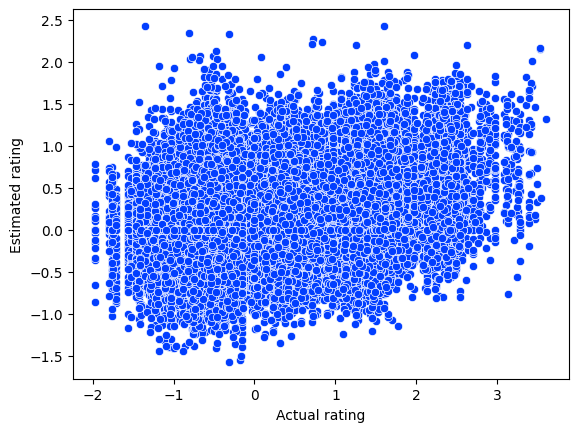

In [121]:
sns.scatterplot(x = actual, y= pred)
plt.xlabel('Actual rating')
plt.ylabel('Estimated rating')